<a href="https://www.kaggle.com/code/mansipanchal24/neo-analysis?scriptVersionId=189280220" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv


# Loading the Dataset and performing some cleaning
We access our dataset using the path given and open it into a dataframe for easy manipulation and cleaning.

In [2]:
file_path = "/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv"

nasa_df = pd.read_csv(file_path)

In [3]:
nasa_df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [4]:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [5]:
nasa_df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [6]:
nasa_df['absolute_magnitude'] = nasa_df['absolute_magnitude'].fillna(nasa_df['absolute_magnitude'].mean())
nasa_df['estimated_diameter_min'] = nasa_df['estimated_diameter_min'].fillna(nasa_df['estimated_diameter_min'].median())
nasa_df['estimated_diameter_max'] = nasa_df['estimated_diameter_max'].fillna(nasa_df['estimated_diameter_max'].median())
nasa_df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [7]:
nasa_df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338199.000000,338199.000000,338199.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157805,0.352863,51060.662908,4.153535e+07
std,2.287225e+07,2.911096,0.313873,0.701842,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


# Visualisations of numeric features
In this dataset, the categorical(non-numeric) features are really not contributing to the decision of if the NEO is hazardous or not, therefore, I focus on the numeric features which are: **'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity'** and **'miss_distance'**

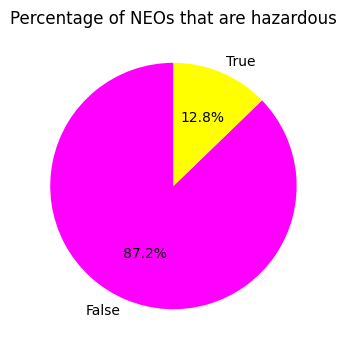

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
haz = nasa_df['is_hazardous'].value_counts()

# Plot the pie chart
haz.plot.pie(autopct='%1.1f%%', figsize=(4,4), startangle=90, cmap='spring')

# Set the title and show the plot
plt.title('Percentage of NEOs that are hazardous')
plt.ylabel('')  # Hide the y-label
plt.show()

In the above pie chart, we can see that the target values are highly biased, which is gonna effect our end result (explained later). 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

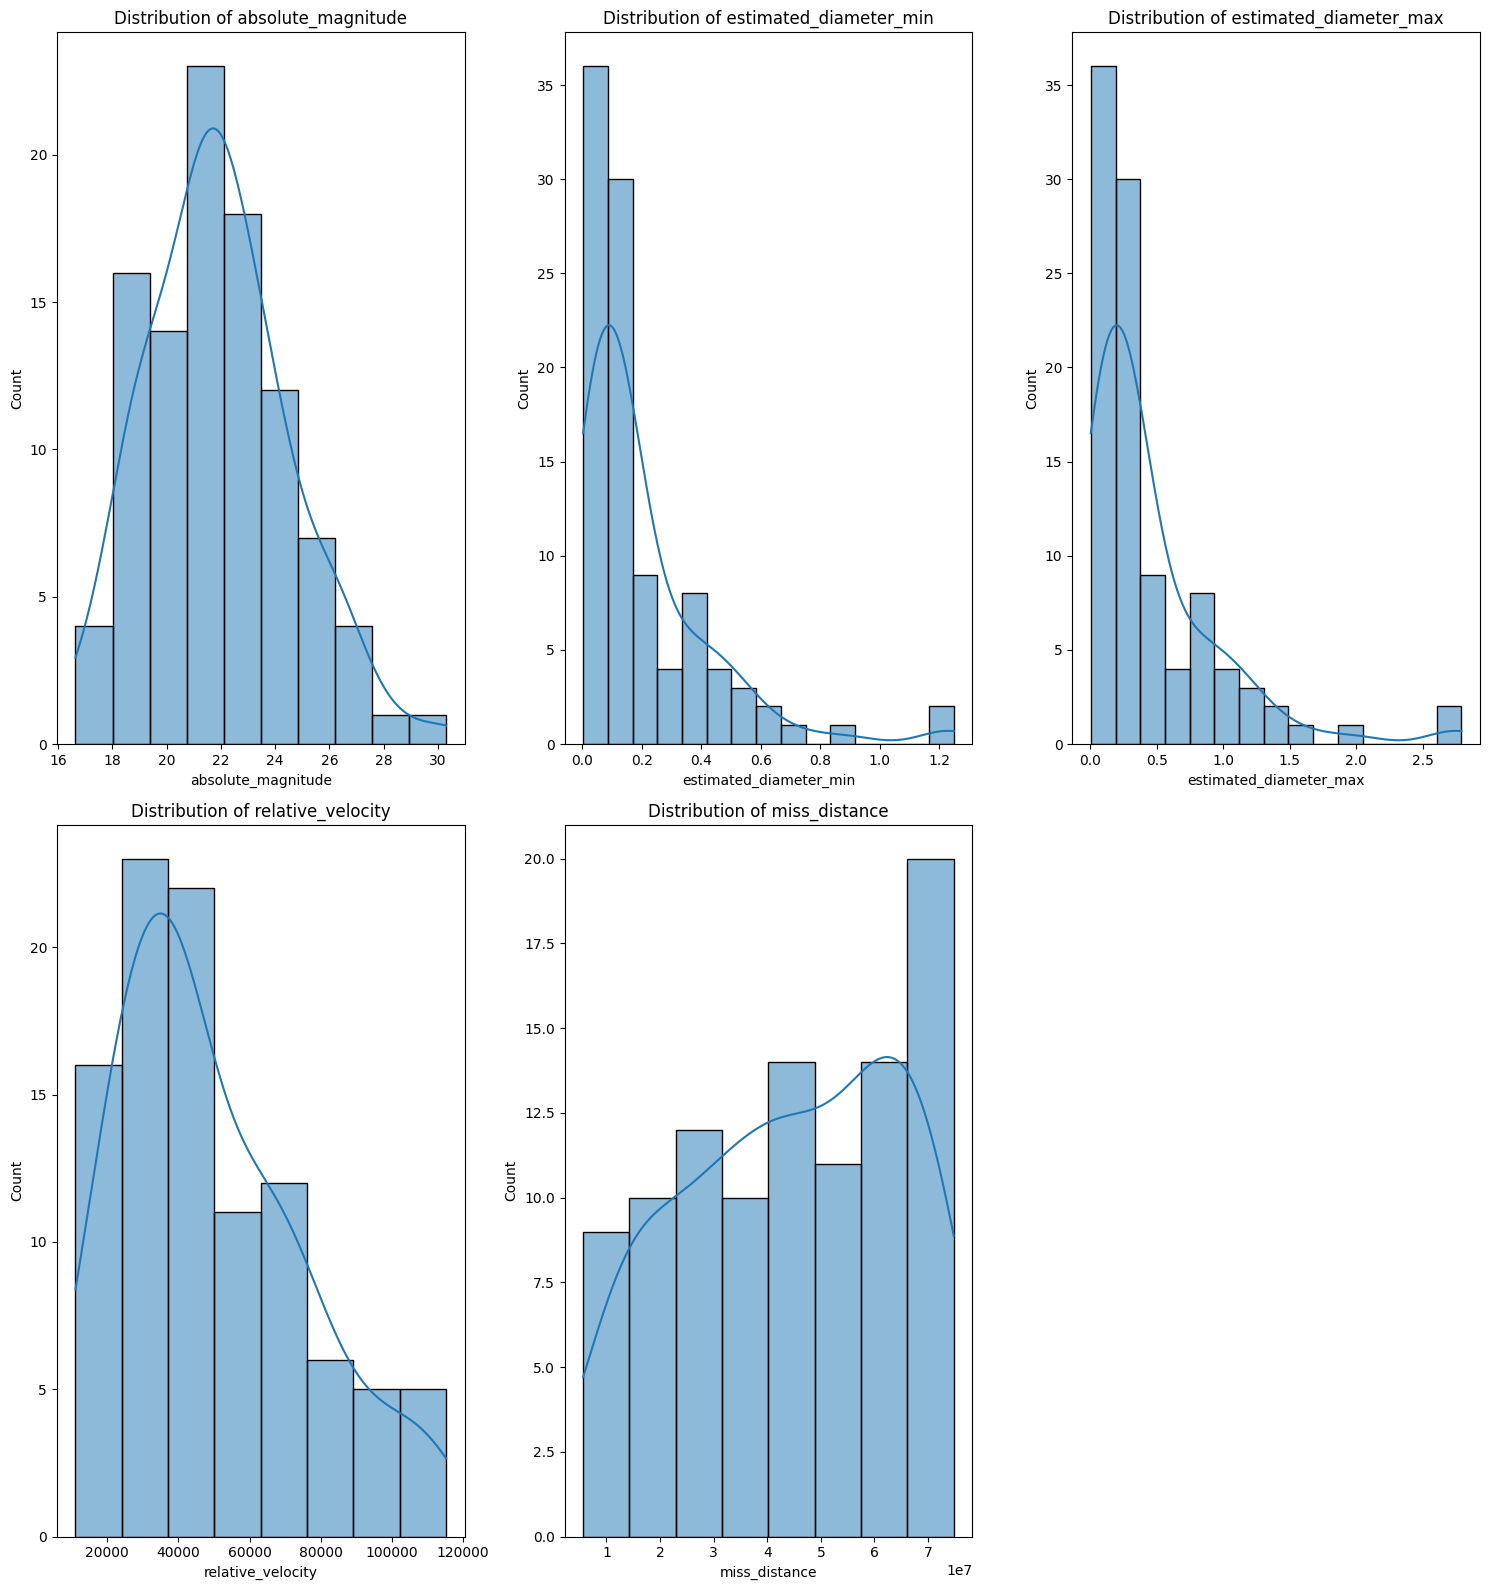

In [9]:
numerical_columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']

plt.figure(figsize=(15,16))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(nasa_df[column].head(100), kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

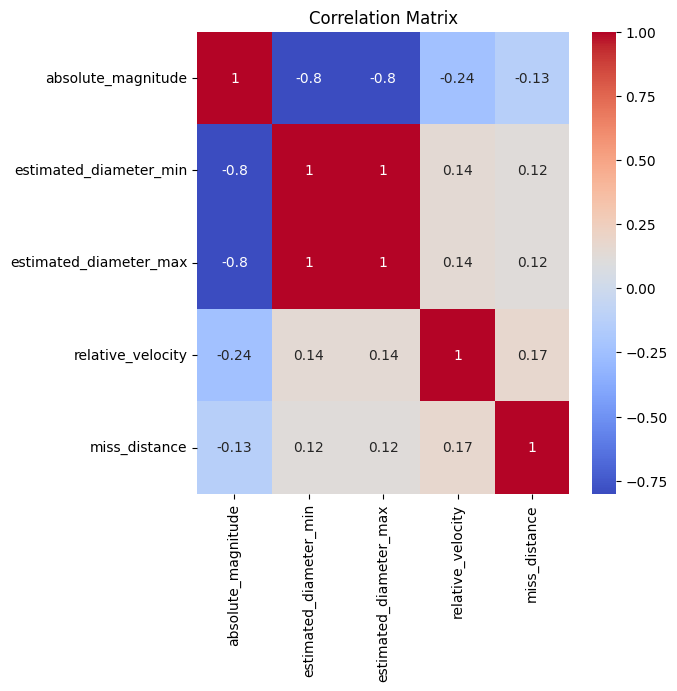

In [10]:
plt.figure(figsize=(6,6))
correlation_matrix = nasa_df[numerical_columns].head(100).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

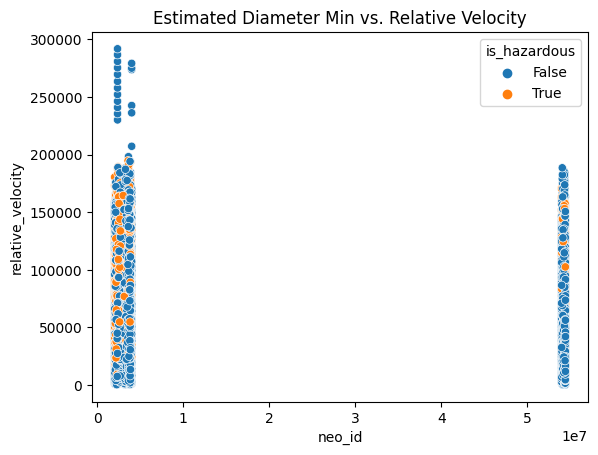

In [11]:
sns.scatterplot(x='neo_id', y='relative_velocity', hue='is_hazardous', data=nasa_df)
plt.title('Estimated Diameter Min vs. Relative Velocity')
plt.show()

The above graph makes it clear that every hazardous NEO has a relative velocity lower than 200,000kmph.

# Creating & training model
I used *RandomForestClassifier* to train the model since they are easy to use, can easily handle large datasets and deal with outliers.
I used *StandardScaler* to normalize the distribution.
 Other than that, I used *classification_report*  and *accuracy_score* to analyse my findings and *train_test_split* to split the data into training and testing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [13]:
x = nasa_df.drop(columns = ['neo_id', 'name','orbiting_body','is_hazardous'])
y = nasa_df['is_hazardous']

In [14]:
x.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07


In [15]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [16]:
x_scaled = pd.DataFrame(x_scale, columns=x.columns)
x_scaled.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,-1.302784,0.755582,0.755582,0.783537,0.799476
1,-1.522633,1.186901,1.186901,2.230715,0.686711
2,-0.509268,-0.068456,-0.068456,-0.992271,1.235756
3,-0.790949,0.130812,0.130812,1.054176,-0.536196
4,-0.079876,-0.258536,-0.258536,0.188485,1.038958


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.35, random_state=42)

I tested out the top 150 rows of my data with different number of estimators in model to see if it was impacting the end accuracy score

Text(0, 0.5, 'Testing Accuracy')

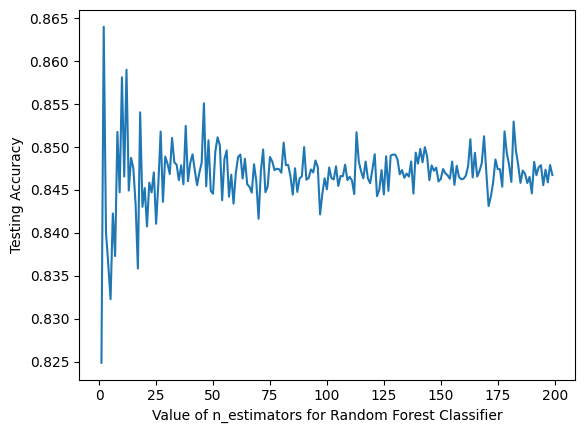

In [18]:
scores =[]
for k in range(1, 200):
    randforest = RandomForestClassifier(n_estimators=k)
    randforest.fit(x_train.head(150), y_train.head(150))
    y_pred = randforest.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Below is a graph to show how important each numeric feature is in predicting if the NEO is hazardous or not.

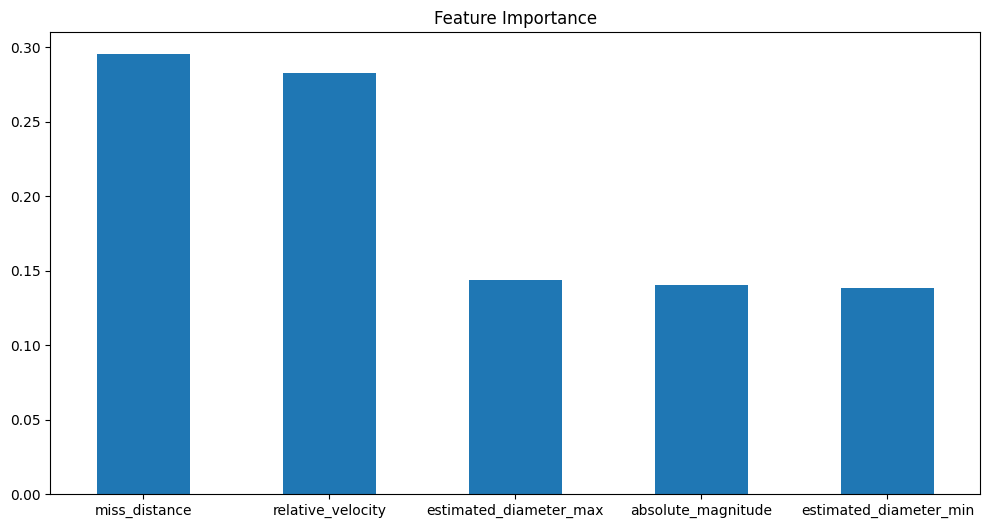

In [20]:
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(12, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xticks(rotation=0)  # Set x labels horizontal
plt.show()

**Final Result** and **Confusion Matrix**

In [21]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.97      0.95    103221
        True       0.71      0.57      0.63     15149

    accuracy                           0.91    118370
   macro avg       0.82      0.77      0.79    118370
weighted avg       0.91      0.91      0.91    118370

Accuracy: 0.9141252006420546


In [22]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[99643  3578]
 [ 6587  8562]]
